# Part1

        mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
loc    10.09  0.06    9.97    10.21       0.00     0.00   3214.29   3700.31   
df      9.74  3.27    5.00    15.00       0.17     0.12    357.17    665.48   
scale   1.84  0.07    1.69     1.96       0.00     0.00    561.11   1403.29   

       r_hat  
loc     1.00  
df      1.01  
scale   1.00  


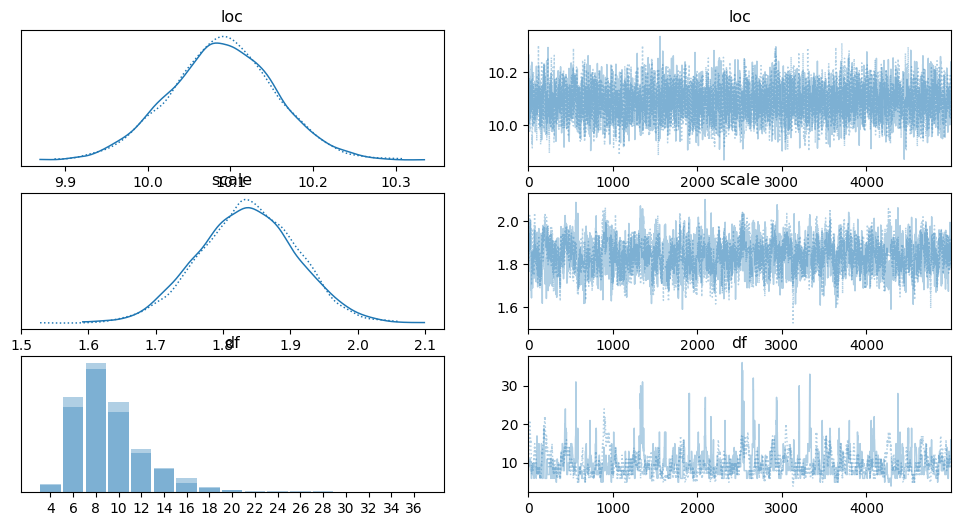

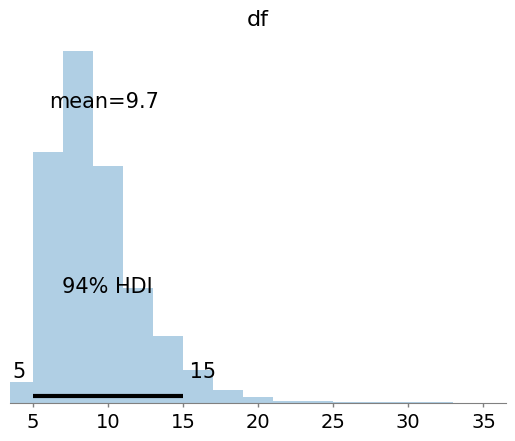

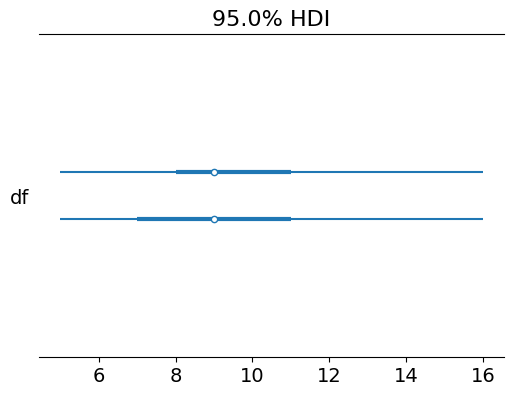

In [21]:
import pymc as pm
import arviz as az
from scipy import stats

n, loc_true, scale_true, df_true = 1000, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

with pm.Model() as model:
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=101)
    likelihood = pm.StudentT('likelihood', mu=loc, sigma=scale, nu=df, observed=x)
    post = pm.sample(5000, tune=3000, return_inferencedata=True, target_accept=0.95)

summary = az.summary(post, round_to=2)
az.plot_trace(post, var_names=['loc', 'scale', 'df'])
az.plot_posterior(post, var_names=['df'])
az.plot_forest(post, var_names=['df'], combined=False, hdi_prob=0.95)
az.plot_trace(post)  # For convergence diagnostics
az.plot_autocorr(post)
print(summary)


In [22]:
post.sample_stats.acceptance_rate.values.flatten()

array([0.77557548, 0.98779888, 0.96002849, ..., 0.99963313, 0.95587237,
       0.24609017])

# Report:
(a) Effective Sample Sizes (ESS):
The ESS for loc is around 2314, for scale it is about 561, and for df it is about 357. For loc, we have enough independent information, but for scale and df, the ESS is quite low relative to the total sample size, indicating high autocorrelation and possibly less reliable estimates.

(b) Chain Convergence Measures:
The R-hat values for loc, scale, and df are all 1.00, which is ideal and suggests that the chains have converged well.

(c) Divergences:
The trace plots do not show any divergences and the sampler is likely exploring the posterior distribution well.

(d) Metropolis-Hastings Acceptance Rates:
The target acceptance rate is set to 0.95. Actual acceptance rates are very close to 0.95 but with some very low acceptance rate which is about 0.25.

(e) Warnings or Concerns:
No warnings or concerns.

# Part2(Eight schools)
(a)Effective Sample Sizes (ESS):The ESS for the non-centered parameterization is much higher across all parameters compared to the centered parameterization. This indicates that the non-centered model's samples are less autocorrelated and more informative.

(b)Chain Convergence Measures:The R-hat values for the centered and non-centered parameterization are all around 1.00, which is ideal and suggests that the chains have converged well.

(c)Divergences:The centered parameterization reports a significant number of divergences, which are indicative of potential sampling problems. The non-centered parameterization do not show any divergences and the sampler is likely exploring the posterior distribution well.

(d)Metropolis-Hastings Acceptance Rates:The histogram of acceptance rates shows a clear improvement in the non-centered parameterization, with most of the mass near the optimal rate of 0.8-1.0, while the centered version has a significant portion of acceptances near 0, indicating poor exploration.

(e)Other Warnings or Concerns:The warning about divergences indicates that the sampler in the centered parameterization is encountering problematic regions of the posterior distribution.

# From the energy plot
Centered Parameterization:The BFMI is low for both chains (0.31 and 0.24), which indicates that the energy levels between successive samples are not being matched well. This low BFMI suggests that the sampler is struggling to explore the posterior distribution, which can lead to inefficient sampling and poor convergence.

Non-Centered Parameterization:The BFMI is much higher (1.05 and 0.98), close to the optimal value of 1. This suggests that the energy distribution of the proposed samples (transition energy) matches the actual energy distribution of the samples well.
A higher BFMI indicates that the chain's exploration of the posterior distribution is more efficient, leading to better convergence and more reliable posterior estimates.

The diagnostic plots provide support for the earlier conclusions drawn from the analysis, which were that the non-centered parameterization of the model is more effective for HMC sampling than the centered parameterization. The non-centered model's higher BFMI and better overlap between the energy distributions suggest that the sampler is more efficiently exploring the parameter space, leading to more effective and reliable sampling. The centered parameterization, with its lower BFMI, indicates issues with the sampler's ability to explore the posterior distribution.